<a href="https://colab.research.google.com/github/Manaswi3104/Plant_Disease_Detection/blob/main/Copy_of_pdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Requirements

In [1]:
%cd /content
!rm -rf yolov5


/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -U -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17488, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 17488 (delta 0), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17488/17488), 16.55 MiB | 27.97 MiB/s, done.
Resolving deltas: 100% (11995/11995), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 3.8 MB/s eta 0:00:

In [ ]:
!pip install -q roboflow ultralytics

# Imports

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sivm205/soybean-diseased-leaf-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.93G/1.93G [00:51<00:00, 40.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1


In [5]:
import os

# Replace 'path' with the actual variable name if needed
for root, dirs, files in os.walk(path):
    print("📁 Directory:", root)
    for name in files[:5]:  # print first 5 files per folder
        print("   📄", name)
    print("---")


📁 Directory: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1
---
📁 Directory: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1/septoria
   📄 Septoriah.jpg
   📄 DSC_0082.jpg
   📄 DSC_0080.jpg
   📄 DSC_0083.jpg
   📄 DSC_0081.jpg
---
📁 Directory: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1/Southern blight
   📄 DSC_0105.jpg
   📄 DSC_0043.jpg
   📄 DSC_0039.jpg
   📄 DSC_0044.jpg
   📄 DSC_0122.jpg
---
📁 Directory: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1/bacterial_blight
   📄 bb (18).jpg
   📄 bb (46).jpg
   📄 bb (30).jpg
   📄 bb (12).jpg
   📄 bb (4).jpg
---
📁 Directory: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset/versions/1/powdery_mildew
   📄 aug_DSC_0078.jpg
   📄 aug_aug_aug_DSC_0059.jpg
   📄 DSC_0209.jpg
   📄 DSC_0210.jpg
   📄 DSC_0066.jpg
---
📁 Directory: /root/.cache/kagglehub/datasets/sivm205/soybean-diseased-leaf-dataset

# Download & Load Dataset

In [ ]:
rf = Roboflow(api_key="BbnmsuVxIX7JOCyUh2Vj")
project = rf.workspace("plant-disease-detection-e6htb").project("plant-disease-detection-rhmhk")
version = project.version(1)
dataset = version.download("folder")

!mv /content/yolov5/Plant-Disease-Detection-1/valid /content/yolov5/Plant-Disease-Detection-1/val

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Plant-Disease-Detection-1 in folder:: 100%|██████████| 6164/6164 [00:01<00:00, 3694.77it/s]


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="fmapQZYONqB4UGjBh6VD")
project = rf.workspace("kkk-en19u").project("green-0vcko")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to green-1 in yolov5pytorch:: 100%|██████████| 1042/1042 [00:00<00:00, 7521.77it/s]


In [ ]:
!mkdir -p /content/yolov5/Plant-Disease-Detection-1/train/not_leaf
!mkdir -p /content/yolov5/Plant-Disease-Detection-1/val/not_leaf

!cp /content/yolov5/green-1/train/images/* /content/yolov5/Plant-Disease-Detection-1/train/not_leaf/
!cp /content/yolov5/green-1/valid/images/* /content/yolov5/Plant-Disease-Detection-1/val/not_leaf/


In [ ]:
!rm -rf /content/yolov5/Plant-Disease-Detection-1


In [ ]:
!rm -rf /content/yolov5/green-1
!rm -rf /content/yolov5/green-0vcko


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fmapQZYONqB4UGjBh6VD")
project = rf.workspace("prior").project("soy-leaf-disease-9zh1t")
version = project.version(1)
dataset = version.download("yolov5")


upload and label your dataset, and get an API KEY here: https://app.roboflow.com/?model=undefined&ref=undefined
loading Roboflow workspace...


RoboflowError: {
    "error": {
        "message": "Unsupported get request. Workspace with ID \"YOUR_WORKSPACE\" does not exist or cannot be loaded due to missing permissions.",
        "status": 404,
        "type": "GraphMethodException",
        "hint": "You can see your available workspaces by issuing a GET request to /workspaces"
    }
}

# Download YOLOv5 pretrained weights
Model weights are available in 5 sizes

- n -> nano
- s -> small
- m -> medium
- l -> large
- x -> extra large

Larger size means deeper neural network, more parameters and better accuracy. At the same time, model will take more space while fine-tuning and inferencing.

In [ ]:
sizes = ['n', 's', 'm', 'l', 'x']
cls = [f'{x}-cls' for x in sizes]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 4.87M/4.87M [00:00<00:00, 115MB/s]

100%|██████████| 10.5M/10.5M [00:00<00:00, 49.6MB/s]

100%|██████████| 24.9M/24.9M [00:00<00:00, 119MB/s] 

100%|██████████| 50.9M/50.9M [00:01<00:00, 49.8MB/s]

100%|██████████| 92.0M/92.0M [00:01<00:00, 49.0MB/s]



In [ ]:
MODEL = "yolov5l-cls.pt"
DATA_PATH = "/content/yolov5/Plant-Disease-Detection-1"
EPOCHS = 20
BATCH_SIZE = 128
PRETRAINED_WEIGHTS = "weights/yolov5l-cls.pt"

In [ ]:
!python classify/train.py \
  --model {MODEL} \
  --data {DATA_PATH} \
  --epochs {EPOCHS} \
  --img {BATCH_SIZE} \
  --pretrained {PRETRAINED_WEIGHTS} \
  --device 0

/content/yolov5/utils/general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-10 04:53:52.073236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749531232.322783   15772 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749531232.390546   15772 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when

In [ ]:
!cp /content/yolov5/runs/train-cls/exp/weights/best.pt /content/drive/MyDrive/


In [ ]:
!mkdir -p /content/drive/MyDrive/yolov5_models/
!cp /content/yolov5/runs/train-cls/exp/weights/best.pt /content/drive/MyDrive/yolov5_models/


# Visualisation
If necessary, check the results folder for metrics and evaluations.

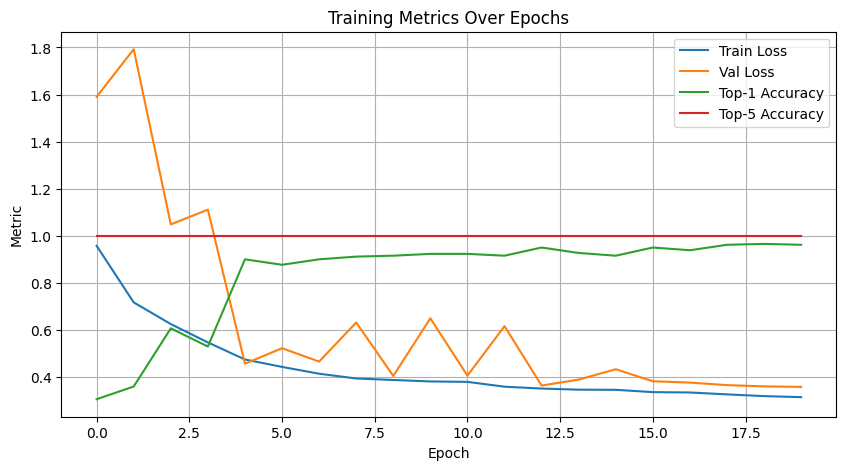

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training results
df = pd.read_csv('/content/yolov5/runs/train-cls/exp/results.csv')  # Update 'exp' if needed
df.columns = df.columns.str.strip()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['train/loss'], label='Train Loss')
plt.plot(df['epoch'], df['val/loss'], label='Val Loss')
plt.plot(df['epoch'], df['metrics/accuracy_top1'], label='Top-1 Accuracy')
plt.plot(df['epoch'], df['metrics/accuracy_top5'], label='Top-5 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

YOLOv11 Fine-Tuning

In [ ]:
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /content/image.jpg

/content/yolov5/utils/general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
classify/predict: weights=['runs/train-cls/exp/weights/best.pt'], source=/content/image.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.11.13 torch-2.7.1+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 215 layers, 25258819 parameters, 0 gradients, 68.3 GFLOPs
100% 755k/755k [00:00<00:00, 19.9MB/s]
image 1/1 /content/image.jpg: 224x224 healthy 0.79, not_leaf 0.12, unhealthy 0.09, 8.5ms
Speed: 0.3ms pre-process, 8.5ms inference, 17.1ms NMS per 

In [ ]:
import shutil

# Copy the pretrained weights to a new location so the original is untouched
shutil.copy("weights/yolov5l-cls.pt", "weights/yolov5l-cls-updated2.pt")


'weights/yolov5l-cls-updated2.pt'

In [ ]:
!pip install --upgrade --force-reinstall numpy scikit-learn


  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.0
    Uninstalling joblib-1.5.0:
      Successfully uninstalled joblib-1.5.0
  A

In [ ]:
!pip install scikit-learn


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Class names
class_names = ['healthy', 'unhealthy', 'not_leaf']

# Replace these with your actual data
# y_true = actual labels (0, 1, 2)
# y_pred = predicted labels (0, 1, 2)
y_true = [0, 0, 1, 1, 2, 2, 0, 1, 2, 2]     # example ground truths
y_pred = [0, 1, 1, 1, 2, 0, 2, 1, 2, 2]     # example predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

# Plot
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (YOLOv5 Leaf Detection)')

plt.savefig("confusion_matrix_leaf_detection.png", dpi=300, bbox_inches='tight')
plt.show()


ImportError: cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.11/dist-packages/numpy/_core/umath.py)

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Save model to Google Drive
!cp /content/yolov5/runs/train-cls/exp/weights/best.pt /content/drive/MyDrive/


In [ ]:
! pip install streamlit


In [ ]:
!pip install streamlit pyngrok


In [ ]:
!pip install pyngrok

In [ ]:
!curl ipv4.icanhazip.com

34.125.5.122


In [ ]:
!ngrok config add-authtoken 2x8A07YkpVJnPhydfqzT6oYCoXG_6CDiffYLT4V8aQQTV1k8e

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import importlib
import subprocess
import sys

# List of required packages
required_packages = [
    'streamlit',
    'torch',
    'torchvision',
    'Pillow'
]

# Function to check and install packages
def install_if_missing(package):
    try:
        importlib.import_module(package)
        print(f"✅ {package} is already installed.")
    except ImportError:
        print(f"⏳ Installing {package}...")
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

# Check and install all
for package in required_packages:
    install_if_missing(package)


✅ streamlit is already installed.
✅ torch is already installed.
✅ torchvision is already installed.
⏳ Installing Pillow...


In [ ]:
import os
print(os.path.exists('runs/train-cls/exp/weights/best.pt'))

True


In [ ]:
from pyngrok import ngrok
import threading
import time
import os

# Kill previous Streamlit processes (optional, prevents conflict)
os.system("pkill -f streamlit")

# Function to run Streamlit app
def run_app():
    os.system("streamlit run app.py")

# Start the Streamlit app in a separate thread
thread = threading.Thread(target=run_app)
thread.start()

# Give Streamlit time to start
time.sleep(5)

# Connect ngrok to the local Streamlit app
public_url = ngrok.connect("http://localhost:8501")
print("Streamlit app is running at:", public_url)


Streamlit app is running at: NgrokTunnel: "https://a58a-34-125-5-122.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok


In [ ]:
!pkill -f ngrok
